# Credit Risk Default Prediction - Exploratory Data Analysis

This notebook performs exploratory data analysis on the German Credit Dataset to understand credit default patterns.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set modern style for visualizations
sns.set_theme(style="whitegrid")
%matplotlib inline

## 1. Data Loading and Initial Exploration

In [9]:
# Read the CSV file with correct delimiter
df = pd.read_csv('german.csv', sep=';')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:", list(df.columns))
print("\nDataset Info:")
df.info()

Dataset Shape: (1000, 21)

Column Names: ['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Age_years', 'Concurrent_Credits', 'Type_of_apartment', 'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4  

## 2. Class Balance Analysis


Class Distribution:
Creditability
1    700
0    300
Name: count, dtype: int64


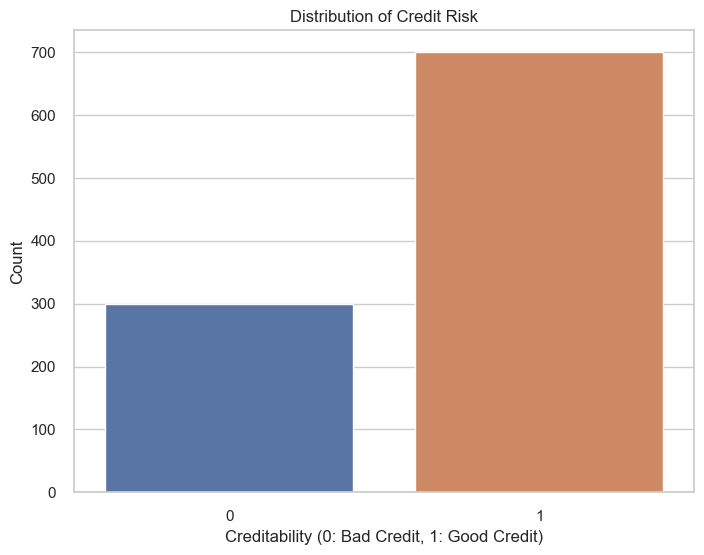

In [10]:
# Check class distribution
class_distribution = df['Creditability'].value_counts()
print("\nClass Distribution:")
print(class_distribution)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Creditability')
plt.title('Distribution of Credit Risk')
plt.xlabel('Creditability (0: Bad Credit, 1: Good Credit)')
plt.ylabel('Count')
plt.show()

## 3. Numerical Features Analysis

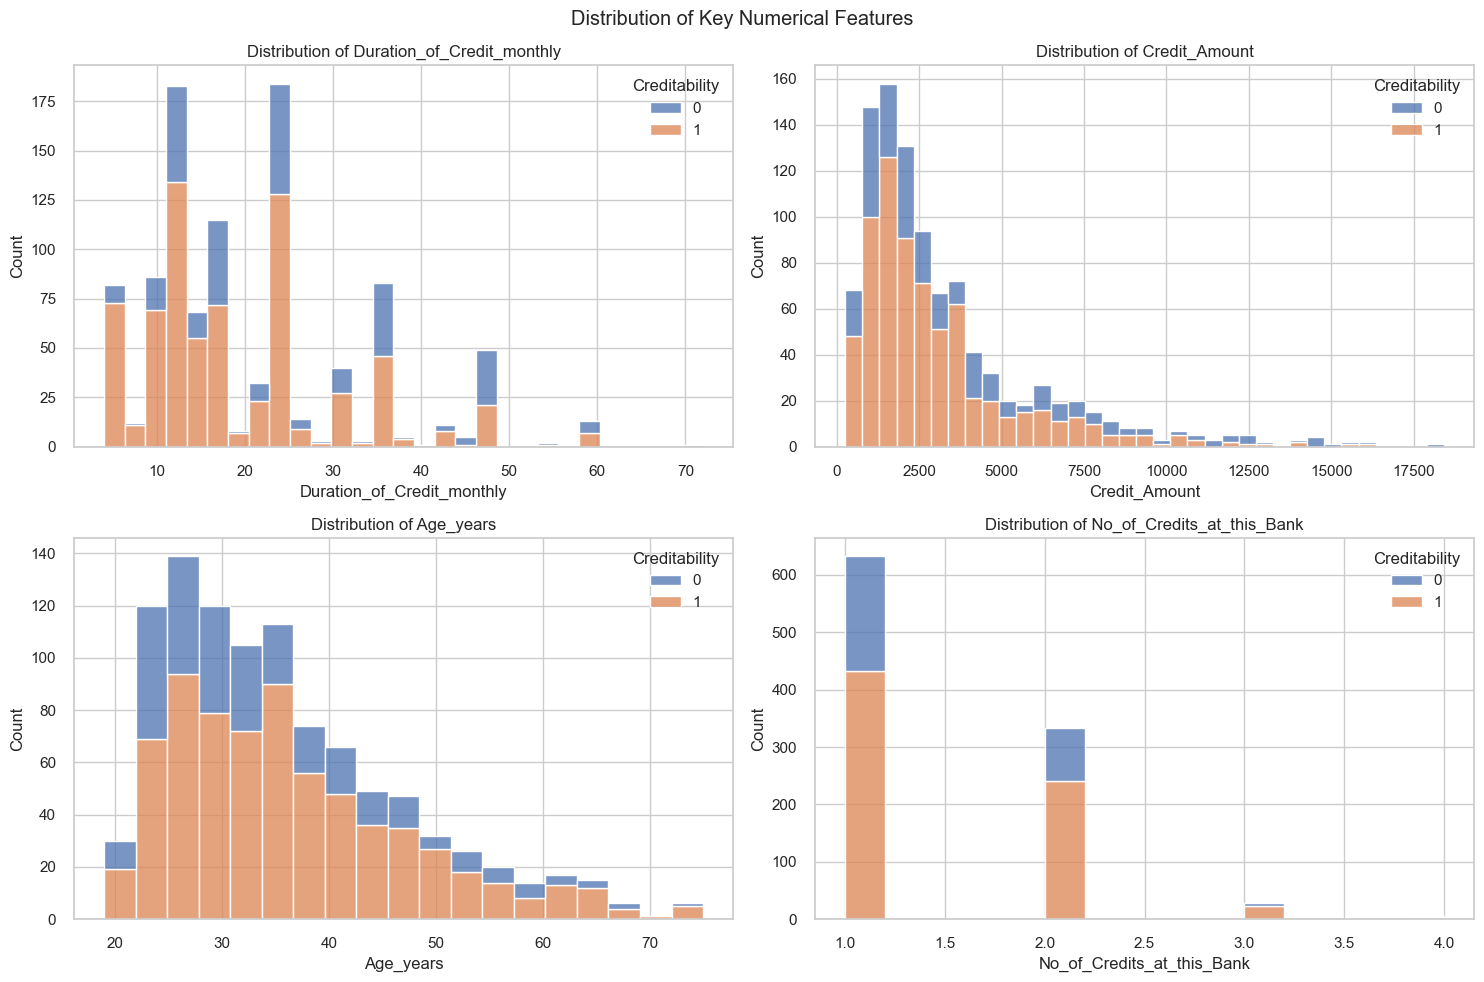

In [13]:
# Select numerical columns
numerical_cols = ['Duration_of_Credit_monthly', 'Credit_Amount', 'Age_years', 'No_of_Credits_at_this_Bank']

# Create distribution plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Numerical Features')

for idx, col in enumerate(numerical_cols):
    row = idx // 2
    col_idx = idx % 2
    sns.histplot(data=df, x=col, hue='Creditability', multiple="stack", ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## 4. Correlation Analysis

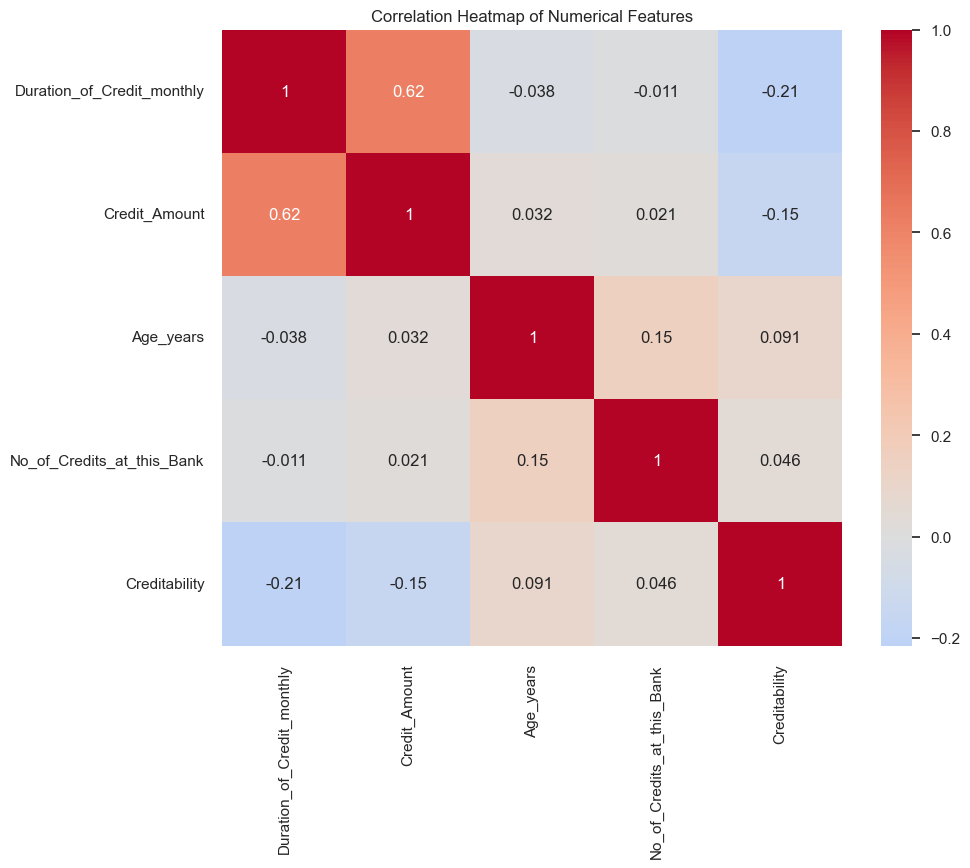

In [14]:
# Create correlation matrix for numerical features
correlation_matrix = df[numerical_cols + ['Creditability']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## 5. Categorical Features Analysis

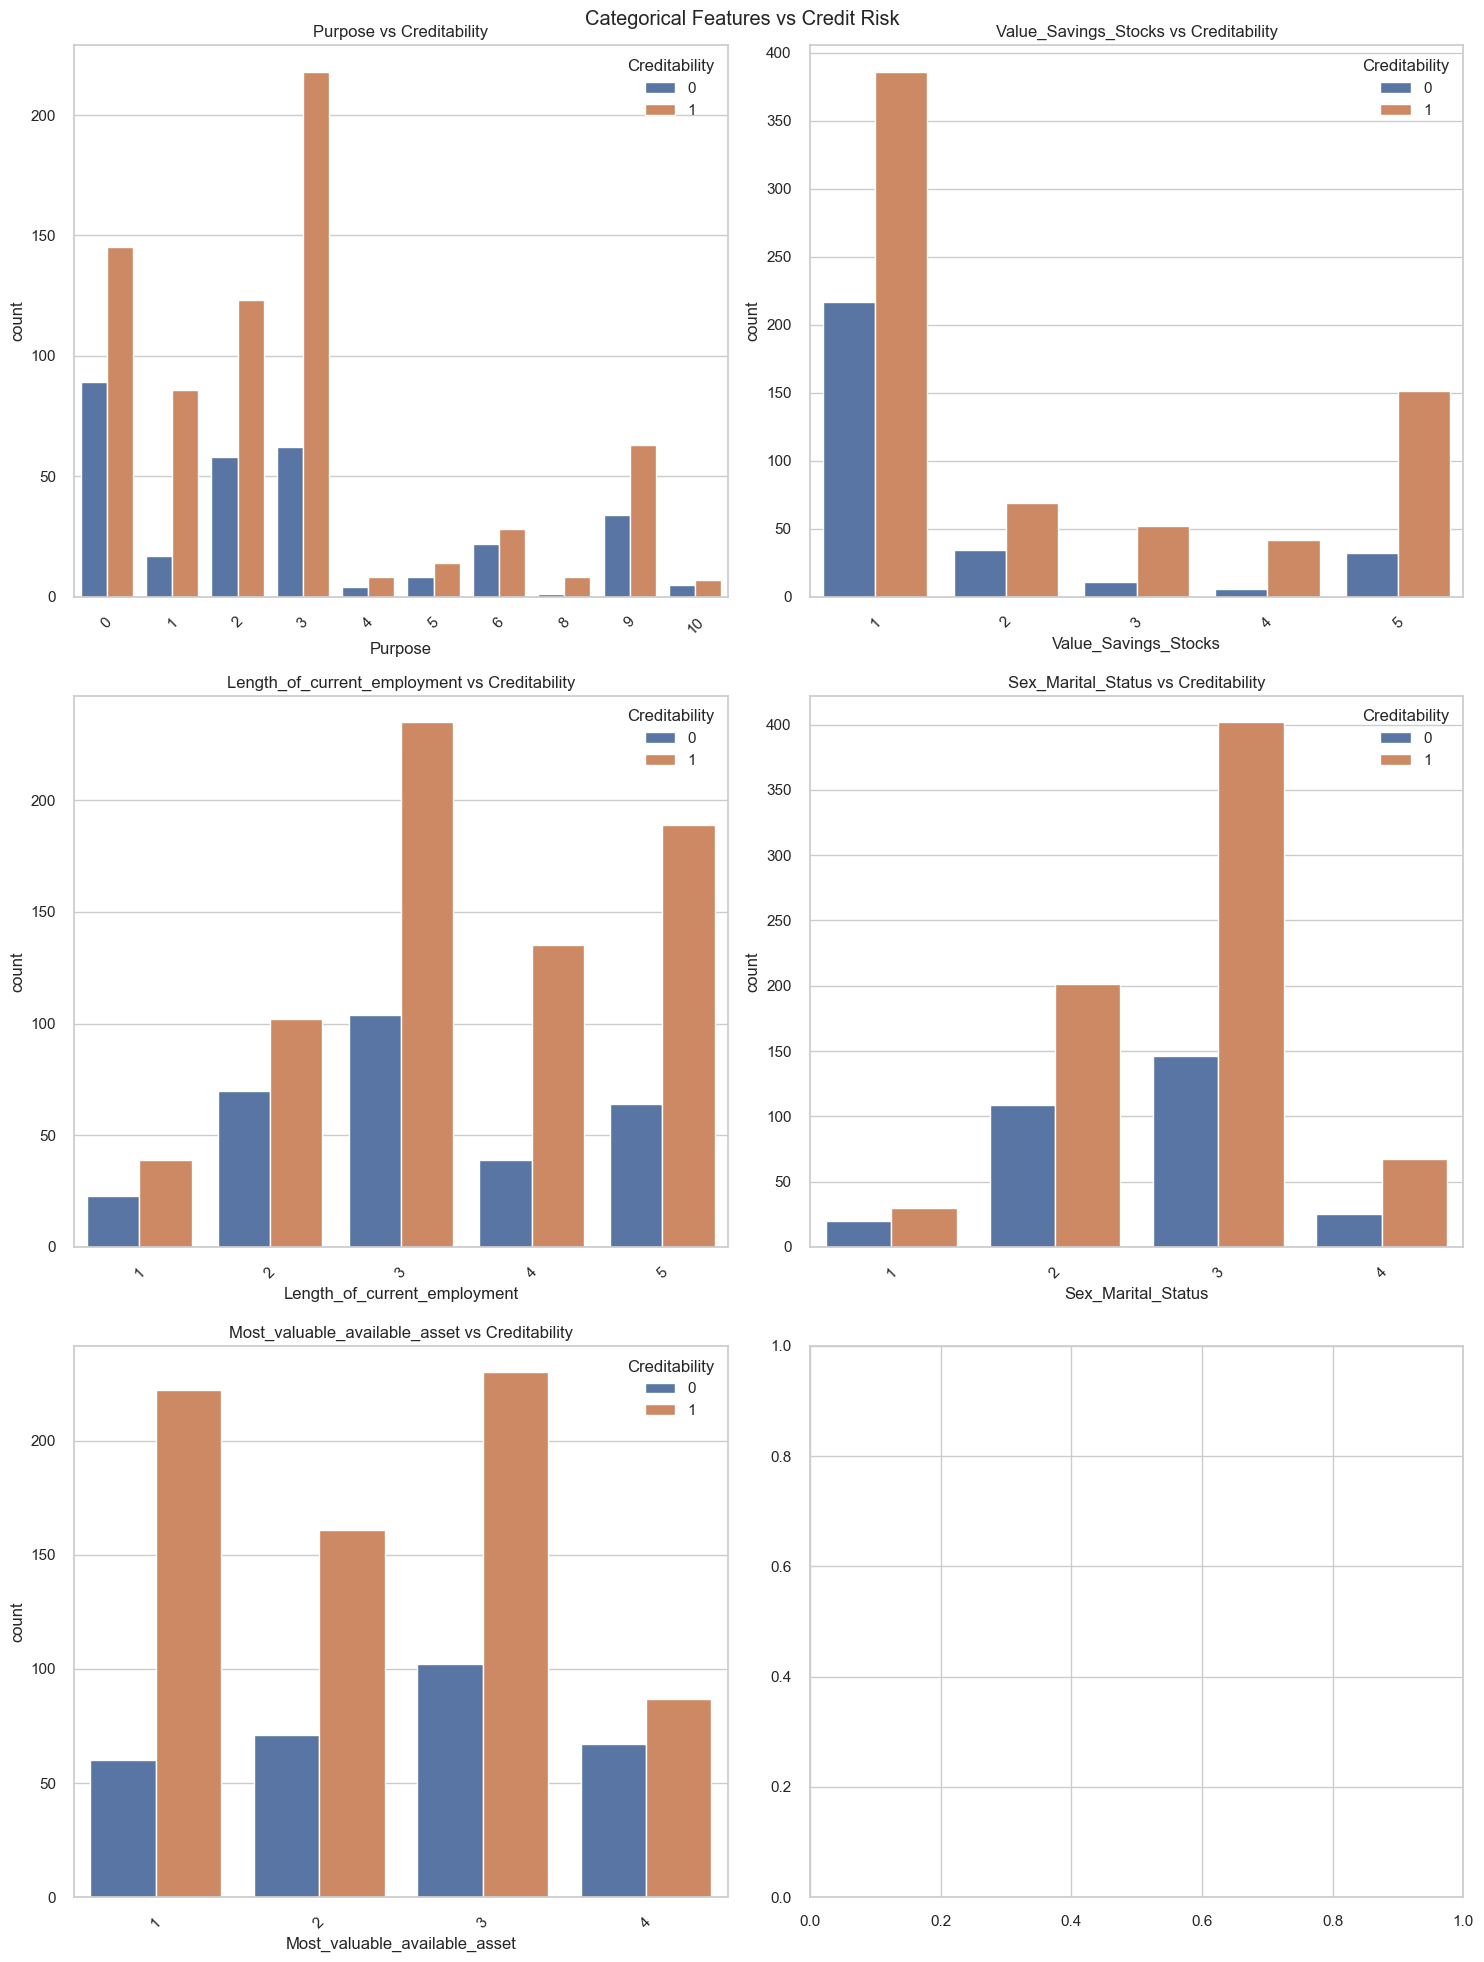

In [16]:
# Select categorical columns
categorical_cols = ['Purpose', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Sex_Marital_Status', 'Most_valuable_available_asset']

# Create bar plots for categorical features vs target
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Categorical Features vs Credit Risk')

for idx, col in enumerate(categorical_cols):
    row = idx // 2
    col_idx = idx % 2
    if idx < len(categorical_cols):
        sns.countplot(data=df, x=col, hue='Creditability', ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'{col} vs Creditability')
        axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Summary Statistics

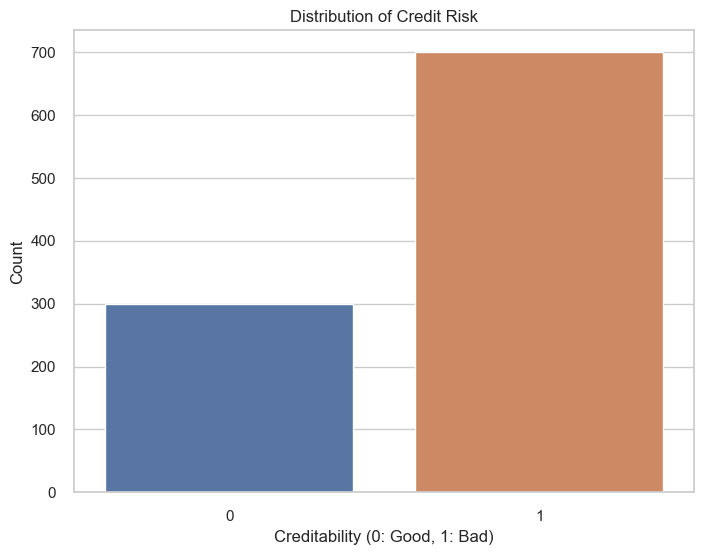


Class Distribution:
Creditability
1    70.0
0    30.0
Name: proportion, dtype: float64


In [17]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Creditability')
plt.title('Distribution of Credit Risk')
plt.xlabel('Creditability (0: Good, 1: Bad)')
plt.ylabel('Count')
plt.show()

# Print class distribution percentages
class_dist = df['Creditability'].value_counts(normalize=True) * 100
print("\nClass Distribution:")
print(class_dist)